# Analyzing astronomical data in Python 🔭

AstroML 🚀 is a Python module for machine learning 🤖 and data mining built on numpy, scipy, scikit-learn, matplotlib, and astropy 🌌, and distributed under the 3-clause BSD license.

It contains a growing library of statistical and machine learning routine for analyzing astronomical data 🌠 in Python 🐍, loaders for several open astronomical datasets 💫, and a large suite of examples of analyzing and visualizing astronomical datasets.

The goal of astroML is to provide a community repository for fast Python implementations of common tools and routines used for statistical data analysis in astronomy 🔭 and astrophysics ⚛️, to provide a uniform and easy-to-use interface to freely available astronomical datasets.

This example is from https://www.astroml.org/ with some modifications📡.

![supernova](https://cdn.spacetelescope.org/archives/images/screen/potw1825a.jpg)

### Lets use simulated data here.
First we will model the distance of 100 supernovae (for a particular cosmology) as a function of redshift.

We rely on that astroML has a common API with scikit-learn, extending the functionality of the latter.

In [ ]:
!pip install astroML

In [ ]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

For non-astrophysicist like me:

`cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)`

This creates a LambdaCDM cosmology model with specific cosmological parameters - H0 Hubble constant, Om0 matter density, Ode0 dark energy density, Tcmb0 CMB temperature.

Learn more about `LambdaCDM`: https://en.wikipedia.org/wiki/Lambda-CDM_model.

<ErrorbarContainer object of 3 artists>

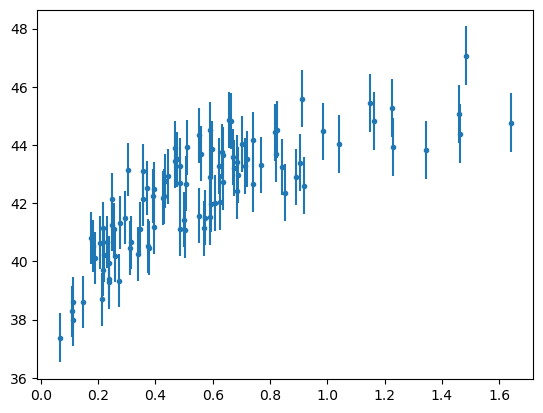

In [ ]:
from astropy.cosmology import LambdaCDM
from astroML.datasets import generate_mu_z

# uses generate_mu_z to create samples of 100 simulated redshift (z) and
# distance modulus (mu) values with uncertainty dmu. A random seed of 0 is set.
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)
z = np.linspace(0.01, 2, 1000)
# uses the cosmology model to compute the true distance modulus mu_true for each redshift in z.
mu_true = cosmo.distmod(z)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.')

## Simple linear regression

Regression defined as the relation between a dependent variable, $y$, and a set of independent variables, $x$,
that describes the expectation value of y given x: $ E[y|x] $

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

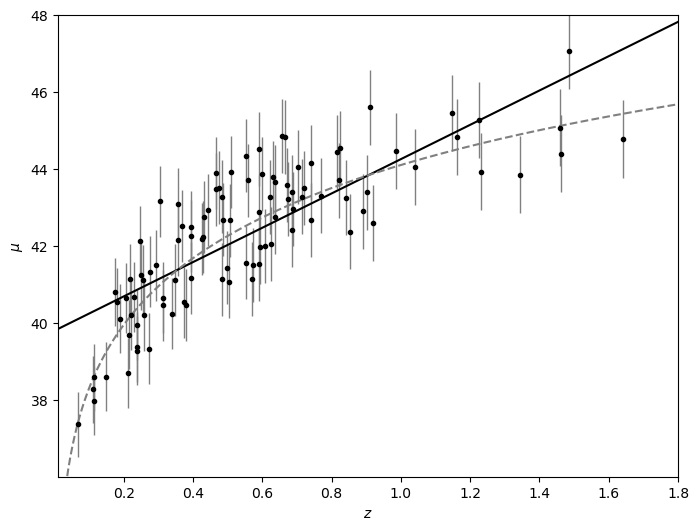

In [ ]:
from sklearn.linear_model import LinearRegression as LinearRegression_sk

linear_sk = LinearRegression_sk()
linear_sk.fit(z_sample[:,None], mu_sample)

mu_fit_sk = linear_sk.predict(z[:, None])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)

ax.plot(z, mu_fit_sk, '-k')
ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)

ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z$')

plt.show()

## Measurement errors

Modifications to LinearRegression in astroML take measurement errors into account on the dependent variable.

c:\users\hong\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


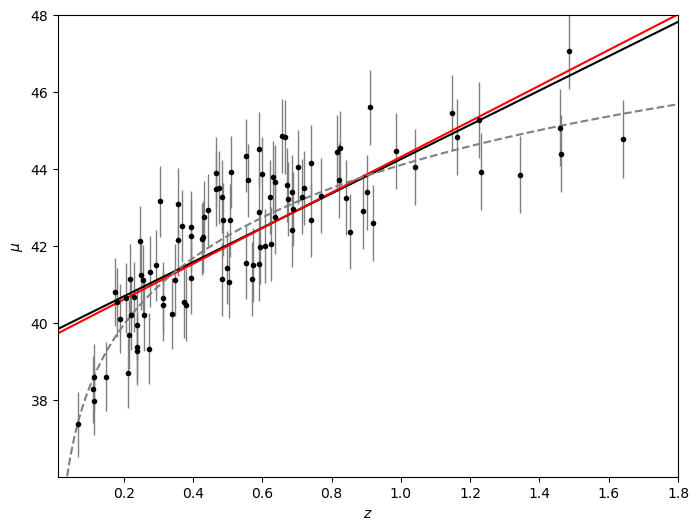

In [ ]:
from astroML.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(z_sample[:,None], mu_sample, dmu)

mu_fit = linear.predict(z[:, None])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)

ax.plot(z, mu_fit_sk, '-k')
ax.plot(z, mu_fit, '-k', color='red')

ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)

ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z$')

plt.show()

## Basis function regression

If we consider a function in terms of the sum of bases (this can be polynomials, Gaussians, quadratics, cubics) then we can solve for the coefficients using regression.

### Polynomial basis functions

polynomial regression:

$$y=a_0+a_1x+a_2x^2+a_3x^3+...$$

Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done here is to take our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

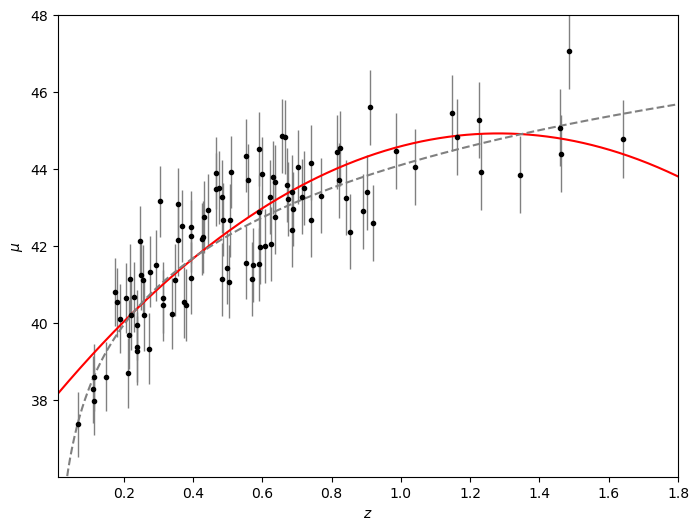

In [ ]:
from astroML.linear_model import PolynomialRegression

# 2nd degree polynomial regression
polynomial = PolynomialRegression(degree=2)
polynomial.fit(z_sample[:,None], mu_sample, dmu)

mu_fit_poly = polynomial.predict(z[:, None])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)

ax.plot(z, mu_fit_poly, '-k', color='red')

ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)

ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z$')

plt.show()

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases. E.g. we could substitute $x^2$ for Gaussians (where we fix $\sigma$ and $\mu$ and fit for the amplitude) as long as the attribute we are fitting for is linear. This is called basis function regression.

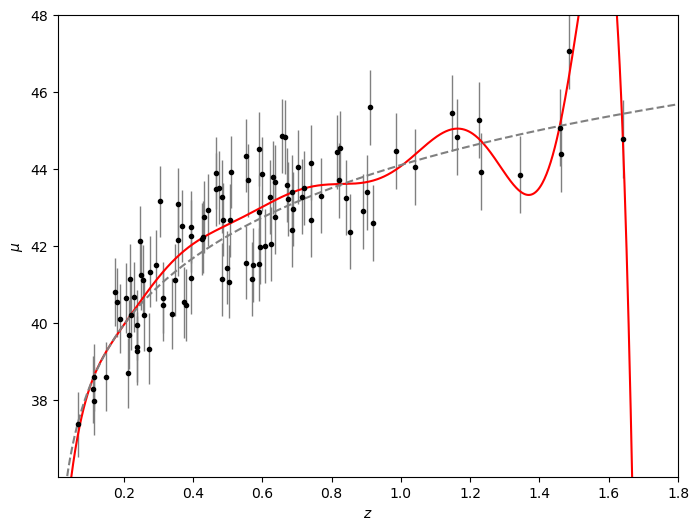

In [ ]:
from astroML.linear_model import BasisFunctionRegression

#------------------------------------------------------------
# Define our number of Gaussians
nGaussians = 10
basis_mu = np.linspace(0, 2, nGaussians)[:, None]
basis_sigma = 3 * (basis_mu[1] - basis_mu[0])

gauss_basis = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
gauss_basis.fit(z_sample[:,None], mu_sample, dmu)

mu_fit_gauss = gauss_basis.predict(z[:, None])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)

ax.plot(z, mu_fit_gauss, '-k', color='red')

ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)

ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z$')

plt.show()

## Credit
https://github.com/astroML/astroML-notebooks/